<a href="https://colab.research.google.com/github/zeeshansafdar751-ops/ERP_vs_blockchain/blob/ER_Dataset/ERP_Blockchain_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib scipy

In [3]:
import pandas as pd

df = pd.read_csv("/data/ERP_vs_Blockchain_SupplyChain_Dataset.csv")
df.head()

,Supply_Chain_Type,Transparency_Score (1-10),Security_Score (1-10),Cost_Efficiency (1-10),Scalability (1-10),Collaboration_Trust (1-10),Operational_Resilience (1-10)
0,ERP-Based,5,6,7,8,5,6
1,ERP-Based,6,7,6,7,6,5
2,ERP-Based,5,6,7,8,5,6
3,Blockchain-Integrated,9,9,8,7,9,9
4,Blockchain-Integrated,8,9,9,8,8,8


===== MEAN COMPARISON RESULTS =====

Transparency_Score (1-10)
 ERP Mean        : 5.33
 Blockchain Mean : 8.67

Security_Score (1-10)
 ERP Mean        : 6.33
 Blockchain Mean : 8.67

Cost_Efficiency (1-10)
 ERP Mean        : 6.67
 Blockchain Mean : 8.33

Scalability (1-10)
 ERP Mean        : 7.67
 Blockchain Mean : 7.33

Collaboration_Trust (1-10)
 ERP Mean        : 5.33
 Blockchain Mean : 8.67

Operational_Resilience (1-10)
 ERP Mean        : 5.67
 Blockchain Mean : 8.67

===== T-TEST RESULTS =====

Transparency_Score (1-10)
 t-statistic = -7.071
 p-value     = 0.0021
 Conclusion: Significant Difference ✅

Security_Score (1-10)
 t-statistic = -4.950
 p-value     = 0.0078
 Conclusion: Significant Difference ✅

Cost_Efficiency (1-10)
 t-statistic = -3.536
 p-value     = 0.0241
 Conclusion: Significant Difference ✅

Scalability (1-10)
 t-statistic = 0.707
 p-value     = 0.5185
 Conclusion: No Significant Difference ❌

Collaboration_Trust (1-10)
 t-statistic = -7.071
 p-value     = 0.0021

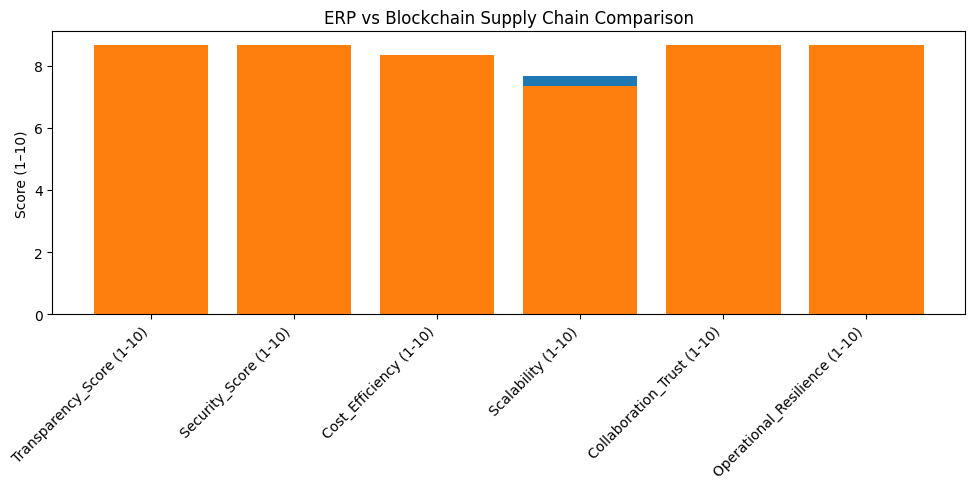

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("/data/ERP_vs_Blockchain_SupplyChain_Dataset.csv")

# Separate ERP and Blockchain data
erp = df[df["Supply_Chain_Type"] == "ERP-Based"]
blockchain = df[df["Supply_Chain_Type"] == "Blockchain-Integrated"]

metrics = [
    "Transparency_Score (1-10)",
    "Security_Score (1-10)",
    "Cost_Efficiency (1-10)",
    "Scalability (1-10)",
    "Collaboration_Trust (1-10)",
    "Operational_Resilience (1-10)"
]

print("===== MEAN COMPARISON RESULTS =====\n")
for m in metrics:
    print(f"{m}")
    print(f" ERP Mean        : {erp[m].mean():.2f}")
    print(f" Blockchain Mean : {blockchain[m].mean():.2f}\n")

print("===== T-TEST RESULTS =====\n")
for m in metrics:
    t_stat, p_value = ttest_ind(erp[m], blockchain[m])
    print(f"{m}")
    print(f" t-statistic = {t_stat:.3f}")
    print(f" p-value     = {p_value:.4f}")
    if p_value < 0.05:
        print(" Conclusion: Significant Difference ✅\n")
    else:
        print(" Conclusion: No Significant Difference ❌\n")

# Plot results
erp_means = erp[metrics].mean()
blockchain_means = blockchain[metrics].mean()

x = range(len(metrics))

plt.figure(figsize=(10,5))
plt.bar(x, erp_means)
plt.bar(x, blockchain_means)
plt.xticks(x, metrics, rotation=45, ha="right")
plt.ylabel("Score (1–10)")
plt.title("ERP vs Blockchain Supply Chain Comparison")
plt.tight_layout()
plt.show()
